#### What is PCA and why use it?
PCA or Principal Component Analysis is a dimentionality reduction technique, which aims at identifying patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.
In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

#### Steps in PCA without scikit-learn:
- Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d)/.
- Construct the projection matrix W from the selected k eigenvectors.
- Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.


#### Things to remember:
- PCA projects the entire dataset onto a different feature (sub)space, maximizing the variance of the data
- In case of a Classification problem, PCA "ignores" class labels


### Data Description - Nutrient Analysis of Pizzas 
(source: https://data.world/sdhilip/pizza-datasets)

The variables in the data set are:

1. brand -- Pizza brand (class label)
2. id -- Sample analysed
3. mois -- Amount of water per 100 grams in the sample
4. prot -- Amount of protein per 100 grams in the sample
5. fat -- Amount of fat per 100 grams in the sample
6. ash -- Amount of ash per 100 grams in the sample
7. sodium -- Amount of sodium per 100 grams in the sample
8. carb -- Amount of carbohydrates per 100 grams in the sample
9. cal -- Amount of calories per 100 grams in the sample



### Import packages

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [24]:
df = pd.read_csv('Pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [26]:
# split data table into data X and class labels y

X = df.iloc[:,2:9].values
y = df.iloc[:,0].values

In [27]:
X_std = StandardScaler().fit_transform(X)

### PCA Projections to 2D

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component1', 'component2'])


principalDf.head()

,component1,component2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152


In [34]:
label_dict = {1: 'A',
              2: 'B',
              3: 'C', 4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J'}

feature_dict = {0: 'mois',
                1: 'prot',
                2: 'fat',
                3: 'ash',
               4:'sodium',
               5:'carb',
               6:'cal'}

In [35]:
finalDf = pd.concat([principalDf, df[['brand']]], axis = 1)

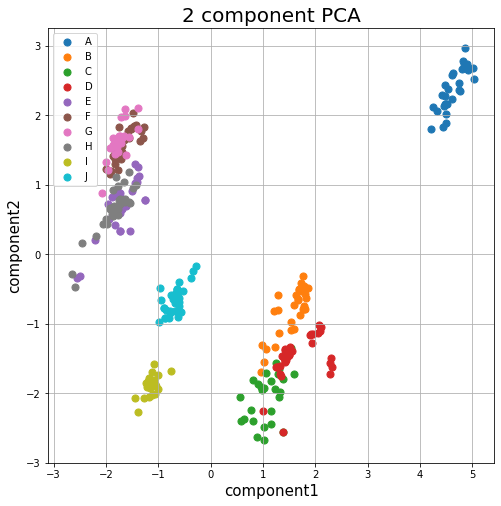

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('component1', fontsize = 15)
ax.set_ylabel('component2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(label_dict.values())

for target in targets:
    indicesToKeep = finalDf['brand'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component1']
               , finalDf.loc[indicesToKeep, 'component2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [38]:
pca.explained_variance_ratio_

array([0.59596884, 0.3272082 ])

In [39]:
print(abs( pca.components_ ))


[[0.06470937 0.3787609  0.44666592 0.47188953 0.43570289 0.42491371
  0.2444873 ]
 [0.62827587 0.26970665 0.23437908 0.11099042 0.20166165 0.32031208
  0.56745756]]


In [40]:

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(label_dict.values())
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

print(dic)

{'PC0': 'D', 'PC1': 'A'}


Sources:
- https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
 
- https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb